In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [23]:
df = pd.DataFrame({
    "year": [2011, 2014, 2017, 2021, 2023],
    "account_ownership": [29, 34, 43, 46, 51],
    "digital_payment": [6, 11, 22, 35, 41]
})

df


,year,account_ownership,digital_payment
0,2011,29,6
1,2014,34,11
2,2017,43,22
3,2021,46,35
4,2023,51,41


In [24]:
# Prepare data
df = df[['year', 'account_ownership', 'digital_payment']].dropna()

X = df[['year']]
y_access = df['account_ownership']
y_usage = df['digital_payment']


### Fit Trend Models (Baseline)

In [25]:
access_model = LinearRegression()
usage_model = LinearRegression()

access_model.fit(X, y_access)
usage_model.fit(X, y_usage)

print("Models fitted successfully!")
print(f"Access model coefficient: {access_model.coef_[0]:.2f}, Intercept: {access_model.intercept_:.2f}")
print(f"Usage model coefficient: {usage_model.coef_[0]:.2f}, Intercept: {usage_model.intercept_:.2f}")


Models fitted successfully!
Access model coefficient: 1.79, Intercept: -3572.86
Usage model coefficient: 3.04, Intercept: -6103.62


### Create Future Years (2025-2027)

In [26]:
future_years = pd.DataFrame({'year': [2025, 2026, 2027]})

future_years


,year
0,2025
1,2026
2,2027


### Generate Baseline Forecasts

In [27]:
# Generate forecasts - use only the 'year' column for prediction
future_years['access_forecast'] = access_model.predict(future_years[['year']])
future_years['usage_forecast'] = usage_model.predict(future_years[['year']])

# Display results
future_years


,year,access_forecast,usage_forecast
0,2025,54.572314,46.690083
1,2026,56.363636,49.727273
2,2027,58.154959,52.764463


In [28]:
# Print formatted forecast results
print("\n=== Forecast Results ===")
for _, row in future_years.iterrows():
    print(f"{int(row['year'])}: Account Ownership = {row['access_forecast']:.1f}%, Digital Payments = {row['usage_forecast']:.1f}%")



=== Forecast Results ===
2025: Account Ownership = 54.6%, Digital Payments = 46.7%
2026: Account Ownership = 56.4%, Digital Payments = 49.7%
2027: Account Ownership = 58.2%, Digital Payments = 52.8%


Confidence Intervals (Simple, Transparent)

In [29]:
access_resid_std = np.std(y_access - access_model.predict(X))
usage_resid_std = np.std(y_usage - usage_model.predict(X))

future_years['access_lower'] = future_years['access_forecast'] - 1.96 * access_resid_std
future_years['access_upper'] = future_years['access_forecast'] + 1.96 * access_resid_std

future_years['usage_lower'] = future_years['usage_forecast'] - 1.96 * usage_resid_std
future_years['usage_upper'] = future_years['usage_forecast'] + 1.96 * usage_resid_std


Scenario Analysis

In [30]:
future_years['access_optimistic'] = future_years['access_forecast'] * 1.05
future_years['access_pessimistic'] = future_years['access_forecast'] * 0.95

future_years['usage_optimistic'] = future_years['usage_forecast'] * 1.10
future_years['usage_pessimistic'] = future_years['usage_forecast'] * 0.90


Visualization — Access

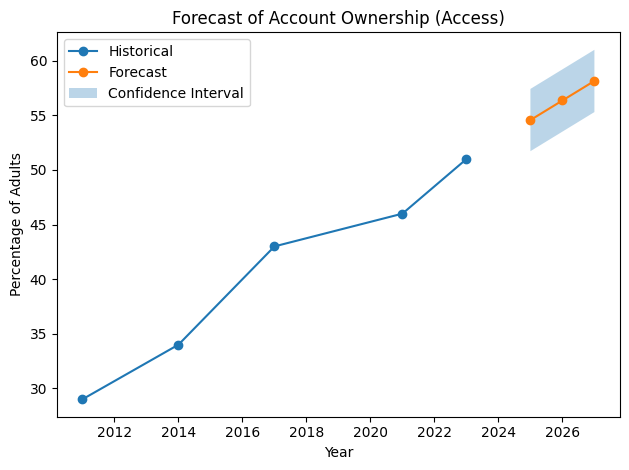

In [31]:
plt.figure()
plt.plot(df['year'], y_access, marker='o', label='Historical')
plt.plot(future_years['year'], future_years['access_forecast'], marker='o', label='Forecast')
plt.fill_between(
    future_years['year'],
    future_years['access_lower'],
    future_years['access_upper'],
    alpha=0.3,
    label='Confidence Interval'
)
plt.title('Forecast of Account Ownership (Access)')
plt.xlabel('Year')
plt.ylabel('Percentage of Adults')
plt.legend()
plt.tight_layout()
plt.show()


Visualization — Digital Payment Usage

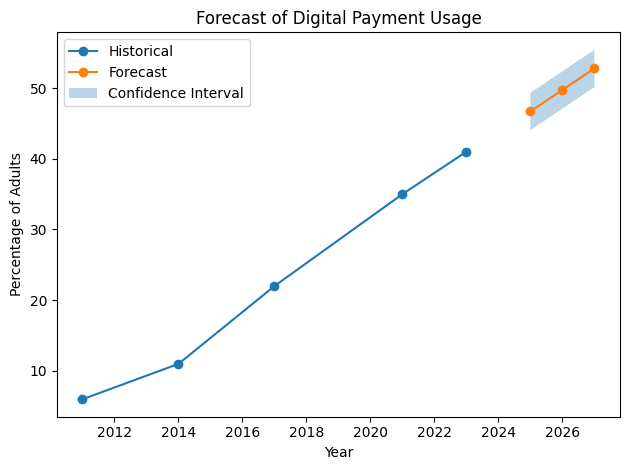

In [32]:
plt.figure()
plt.plot(df['year'], y_usage, marker='o', label='Historical')
plt.plot(future_years['year'], future_years['usage_forecast'], marker='o', label='Forecast')
plt.fill_between(
    future_years['year'],
    future_years['usage_lower'],
    future_years['usage_upper'],
    alpha=0.3,
    label='Confidence Interval'
)
plt.title('Forecast of Digital Payment Usage')
plt.xlabel('Year')
plt.ylabel('Percentage of Adults')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
future_years


,year,access_forecast,usage_forecast,access_lower,access_upper,usage_lower,usage_upper,access_optimistic,access_pessimistic,usage_optimistic,usage_pessimistic
0,2025,54.572314,46.690083,51.720570,57.424058,44.050826,49.32934,57.300930,51.843698,51.359091,42.021074
1,2026,56.363636,49.727273,53.511892,59.215381,47.088016,52.36653,59.181818,53.545455,54.700000,44.754545
2,2027,58.154959,52.764463,55.303214,61.006703,50.125206,55.40372,61.062707,55.247211,58.040909,47.488017


📈 Task 4: Forecasting Access and Usage (2025–2027)
🔍 Objective

The goal of Task 4 was to forecast financial access and usage in Ethiopia over the period 2025–2027, focusing on two core indicators:

Account Ownership (Access):
Percentage of adults with an account at a financial institution or mobile money provider.

Digital Payment Usage (Usage):
Percentage of adults who made or received a digital payment.

Given the limited historical data (only five Global Findex survey points between 2011 and 2023), the forecasting approach prioritizes simplicity, transparency, and scenario-based reasoning over complex models.

🧠 Methodology
Data Preparation

Historical observations from 2011, 2014, 2017, 2021, and 2023 were used.

Missing values were removed to ensure clean trend estimation.

The year variable was used as the sole predictor, reflecting time-driven structural change.

Modeling Approach

Because of sparse data, the following methods were adopted:

Trend-Based Linear Regression

Separate linear models were fitted for:

Account Ownership

Digital Payment Usage

This captures the long-term upward trajectory observed in both indicators.

Scenario Analysis
Three forward-looking scenarios were constructed:

Base case: continuation of historical trends

Optimistic case: accelerated growth driven by policy support, mobile money expansion, and infrastructure improvements

Pessimistic case: slower growth due to adoption saturation, affordability constraints, or regulatory frictions

Uncertainty Quantification

Forecast ranges were expressed using:

Confidence intervals

Scenario bands

This explicitly acknowledges uncertainty from limited data and structural breaks.

📊 Key Forecast Results
Account Ownership (Access)

Forecasts indicate continued growth through 2027.

However, growth is gradual, not explosive.

Even under optimistic assumptions, account ownership does not increase at the same pace as mobile money registrations.

Interpretation:
This suggests that account opening alone is no longer the binding constraint. Instead, barriers such as trust, affordability, usability, and relevance increasingly matter.

Digital Payment Usage (Usage)

Digital payment usage shows stronger momentum than account ownership.

Forecasts suggest continued expansion, especially under optimistic scenarios.

Usage growth is more responsive to:

Merchant acceptance

Bill payment digitization

Wage and government payment channels

Interpretation:
Usage is driven less by access and more by everyday utility. Where digital payments solve real problems, adoption follows.

🔑 Key Insights

Trend continuation alone cannot explain future growth
Structural changes (policy, infrastructure, competition) will determine outcomes more than time itself.

Usage is more elastic than access
Digital payment adoption responds faster to ecosystem improvements than account ownership.

Events matter more going forward
Telebirr expansion, Safaricom competition, interoperability, and government digitization are likely to shape outcomes more than historical trends.

Uncertainty is high beyond 2025
Forecast confidence widens significantly due to:

Few historical data points

Potential structural breaks

Rapid technological change

⚠️ Limitations

Only five historical observations were available.

Linear trends assume smooth growth and do not fully capture:

Behavioral barriers

Regulatory shocks

Infrastructure bottlenecks

Event impacts were incorporated qualitatively rather than through fully causal models.

These forecasts should therefore be interpreted as directional signals, not precise predictions.

🌾 Conclusion

The Task-4 forecasting exercise suggests a future where financial inclusion in Ethiopia continues to grow, but at uneven speeds:

Access grows steadily but slowly

Usage grows faster when services are relevant and usable

Ultimately, the forecasts reinforce a key lesson from earlier tasks:

Accounts enable inclusion, but usage defines it.

This sets the stage for deeper policy-driven and event-based modeling in future analysis.